# Whittaker Biome Local Variation Analysis

## Introduction

A Whittaker Biome Diagram maps average temperatures (degrees C) and annual precipitation (cm) onto biomes/ecosystems. The biomes are tropical rain forest, temperate rainforest, tropical seasonal forest and savanna, temperate deciduous forest, taiga, temperate grassland and desert, subtropical desert, and tundra. The diagram shows average temperature on the x-axis and annual precipitation on the y-axis. Biomes are plotted as areas within the graph. For example, a point with an average temperature of 10 degrees C and an annual precipitation of 150 cm is classified as a temperate deciduous forest.

As climates change, a particular location may experience a shift within one biome or between multiple biomes. How can we visualize this change?

The first thing we need is weather data. We will use the Meteostat library. Second, we will need to plot the weather data. To plot the data, we will use a bivariate visualization from the seaborn library.

## Collect weather data

In [1]:
# Import Meteostat library and dependencies
from meteostat import Point, Hourly, Daily, Monthly, Stations
from datetime import datetime, date, time
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Calculate start and end dates
start = date(2022-30, 6, 1)
end = date(2022, 6, 1)

t1 = time(0, 0)
t2 = time(23, 59)

start = datetime.combine(start, t1)
end = datetime.combine(end, t2)

In [3]:
lat = 27.94
lon = -82.46

In [4]:
#stations = stations.nearby(lat, lon)
tampa = Point(lat, lon)

In [5]:
#monthlyData = Monthly(station, start, end).fetch()
monthlyData = Monthly(tampa, start, end).fetch()

In [6]:
monthlyData

,tavg,tmin,tmax,prcp,wspd,pres,tsun
time,,,,,,,
1992-06-01,27.8,23.4,32.1,179.0,11.9,1013.3,16920.0
1992-07-01,28.8,23.8,33.7,71.0,9.3,1019.3,20700.0
1992-08-01,28.0,23.4,32.5,209.0,10.2,1018.2,14880.0
1992-09-01,27.8,22.8,32.7,75.0,10.5,1016.3,14220.0
1992-10-01,22.5,17.4,27.7,75.0,12.3,1016.8,13800.0
...,...,...,...,...,...,...,...
2022-02-01,19.4,14.0,25.6,23.0,9.4,1021.9,NaN
2022-03-01,22.8,18.0,28.6,73.9,13.3,NaN,NaN
2022-04-01,23.8,19.3,29.3,198.4,12.3,1017.9,NaN


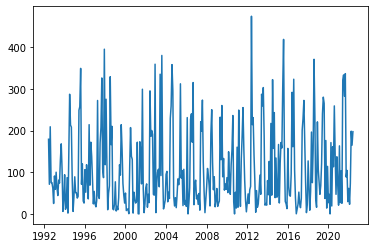

In [7]:
# Plot the data
plt.plot(monthlyData.index, monthlyData['prcp'])
plt.show()

In [8]:
# Get month from the time index
#dailyData['day'] = dailyData.index.day
#dailyData['month'] = dailyData.index.month

# Get year from the time index
monthlyData['year'] = monthlyData.index.year

In [9]:
# Collect annual averages
grouped = monthlyData.groupby(['year']).agg({'prcp': ['sum'], 'tavg': ['mean']}).reset_index()
grouped.columns = ['year','annual_prcp', 'average_temperature']

# Round temperatures to 2 digits
grouped['average_temperature'] = round(grouped['average_temperature'],2)

# Convert precipitation from mm to cm
grouped['annual_prcp'] = grouped['annual_prcp']*0.1

grouped

,year,annual_prcp,average_temperature
0,1992,69.60,24.84
1,1993,95.40,22.52
2,1994,120.10,23.39
3,1995,137.40,22.79
4,1996,114.60,22.36
5,1997,171.80,23.18
6,1998,140.10,23.55
7,1999,87.40,22.99
8,2000,76.15,22.86
9,2001,101.35,22.98


## Plot weather data

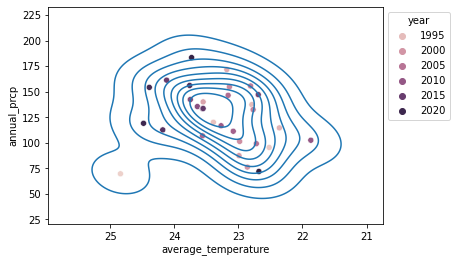

In [10]:
fig, axes = plt.subplots()
sns.kdeplot( x=grouped["average_temperature"], y=grouped["annual_prcp"],  ax=axes)
sns.scatterplot(x=grouped["average_temperature"],y=grouped["annual_prcp"], ax = axes, hue=grouped["year"])
#sns.lineplot(grouped,x=grouped["average_temperature"],y=grouped["annual_prcp"], sort=False, color='black', lw=1)
sns.move_legend(axes, "upper left", bbox_to_anchor=(1, 1))
axes.invert_xaxis()

The weather data has been plotted and can now be compared to the Whittaker Biome Diagram.

In [11]:
# import image module
from IPython.display import Image
  
# get the image
Image(url="whittakerbiomediagram.png", width=600, height=600)

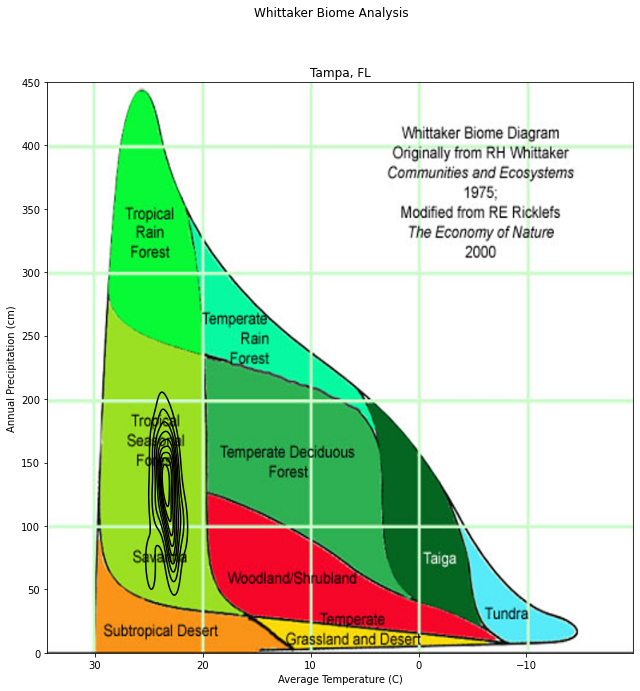

In [67]:
import matplotlib.image as mpimg # add
#h = sns.heatmap(df_cnt, alpha=0.1, zorder=2) # update
fig, axes = plt.subplots()
h = sns.kdeplot( x=grouped["average_temperature"], y=grouped["annual_prcp"], ax=axes, color="black")
my_image = mpimg.imread('whittakerbiomediagram-trimmed.png') # update
# update
#axes.set_xlim(0,733)
axes.set_xlim(34.4,-19.9)
axes.set_ylim(0,450)
h.imshow(my_image,
         aspect=h.get_aspect(),
         extent= h.get_xlim() + h.get_ylim(),
         zorder=1)
fig.set_size_inches(10.5, 10.5)

plt.title("Tampa, FL")
plt.suptitle("Whittaker Biome Analysis")
plt.xlabel('Average Temperature (C)')
plt.ylabel('Annual Precipitation (cm)')

plt.show() # add